# **Neural Networks with Sequential API**

### **1. Import Necessary Libraries**

In [56]:
# Import the os module & set TensorFlow to suppress less severe logging messages. This helps reduce clutter in the output.
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf      # for building and training the neural network
from tensorflow.keras.datasets import mnist      # for loading the MNIST dataset
import keras
from keras import layers
from tensorflow.keras.utils import to_categorical      # for converting labels to one-hot encoding
import matplotlib.pyplot as plt      # for plotting and visualizing the data and results

### **2. Load the MNIST Dataset**

**MNIST Dataset:**
The MNIST dataset consists of images of handwritten digits, where each image is labeled with a digit between 0 and 9. Therefore, there are 10 possible classes (one for each digit).

In [57]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### **3. Preprocessing the MNIST Dataset**

In [58]:
# Purpose: Reshape the 28x28 pixel images into 1D arrays of size 784 (28*28) and
# normalize pixel values to the range [0, 1] by dividing by 255.
x_train, x_test = x_train.reshape(-1, 28*28).astype('float32')/255.0, x_test.reshape(-1, 28*28).astype('float32')/255.0

In [59]:
# Convert labels to one-hot encoding
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

### **4. Building and Using a Sequential Model**

In [60]:
# Initialize a Sequential model. This model allows you to stack layers linearly.
model = keras.Sequential()  

# Add an input layer to the model with the shape of the input data, which is 784 features (28x28).
model.add(keras.Input(shape=(28*28))) 

# Add a Dense (fully connected) layer with 512 units and ReLU (Rectified Linear Unit) activation.
model.add(layers.Dense(512, activation='relu'))

# Add another Dense layer with 256 units and ReLU activation.
model.add(layers.Dense(256, activation='relu'))

# Add a final Dense layer with 10 units, corresponding to the 10 classes of MNIST digits (0 through 9). The activation function is softmax for classification.
model.add(layers.Dense(10, activation='softmax'))

### **5. Compile the Model**

In [61]:
# Compile the model with a loss function, optimizer, and metrics.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### **6. Train the Model**

In [62]:
# Train the model with training data.
history = model.fit(x_train, y_train, epochs=6, batch_size=32, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 16s 9ms/step - loss: 0.2049 - accuracy: 0.9383 - val_loss: 0.1239 - val_accuracy: 0.9621
Epoch 2/6
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0838 - accuracy: 0.9741 - val_loss: 0.0901 - val_accuracy: 0.9750
Epoch 3/6
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0585 - accuracy: 0.9816 - val_loss: 0.0863 - val_accuracy: 0.9758
Epoch 4/6
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0437 - accuracy: 0.9855 - val_loss: 0.0923 - val_accuracy: 0.9758
Epoch 5/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0328 - accuracy: 0.9894 - val_loss: 0.0965 - val_accuracy: 0.9767
Epoch 6/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0269 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9768


### **7. Evaluate the Model**

In [63]:
# Evaluate the model on the test data.
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9759
Test Loss: 0.09175543487071991
Test Accuracy: 0.9758999943733215


### **8. Plot Training and Validation Metrics**

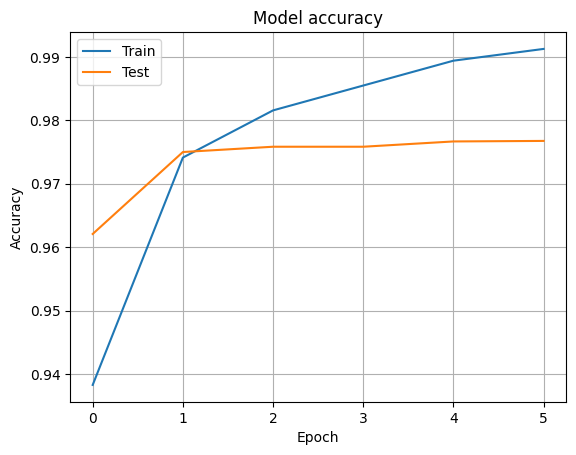

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

### **9. Make Predictions with the Model**

In [65]:
# Predict features from the training data and print the shape of the output.
# Note: You can use `model.predict` to get predictions, but for features, we use the intermediate model.
feature_model = keras.Model(inputs=model.inputs, outputs=[model.layers[-1].output])
feature = feature_model.predict(x_train)
print(feature.shape)

1875/1875 [==============================] - 4s 2ms/step
(60000, 10)
